In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt

### Data Understanding and Exploration

In [2]:
df=pd.read_csv("adverts.csv")

In [3]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [5]:
df.shape

(402005, 12)

In [6]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


The average price is 17341.97 and the average mileage of cars 37743.59


array([[<AxesSubplot:title={'center':'public_reference'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'year_of_registration'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

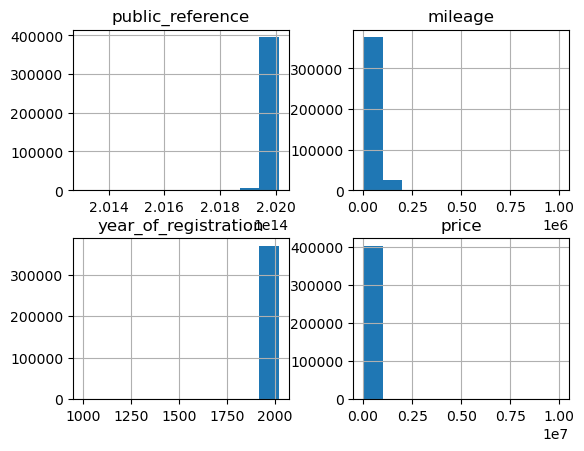

In [7]:
df.hist()
# the data is skewed to the right

<AxesSubplot:title={'center':'Histogram: log10 (mileage)'}>

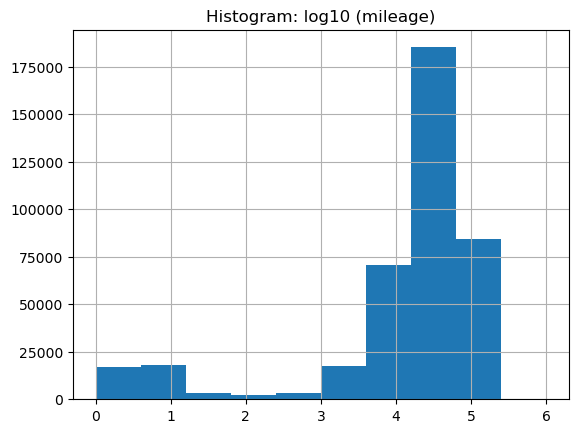

In [8]:
plt.title("Histogram: log10 (mileage)")
df['mileage'].apply(lambda x: 0 if np.isinf(np.log10(x)) else np.log10(x)).hist()

Text(0.5, 1.0, 'Histogram: log 10 (price)')

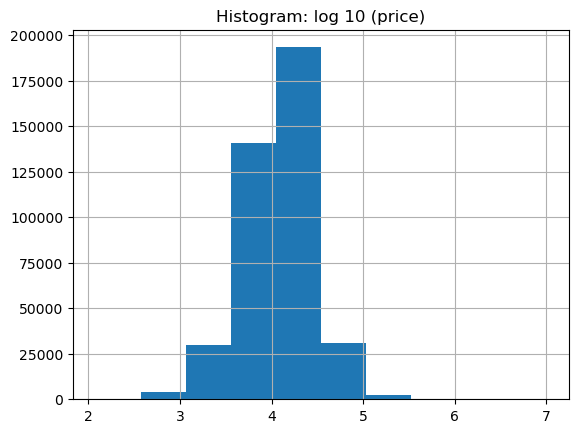

In [9]:
df['price'].apply(lambda x: 0 if np.isinf(np.log10(x)) else np.log10(x)).hist()
plt.title("Histogram: log 10 (price)")

Text(0.5, 1.0, 'Histogram: log10(year)')

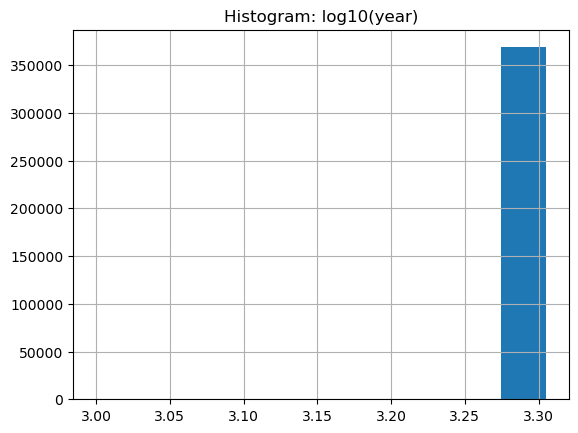

In [10]:
df['year_of_registration'].apply(lambda x: 0 if np.isinf(np.log10(x)) else np.log10(x)).hist()
plt.title("Histogram: log10(year)")

Text(0.5, 1.0, 'Mileage boxplot')

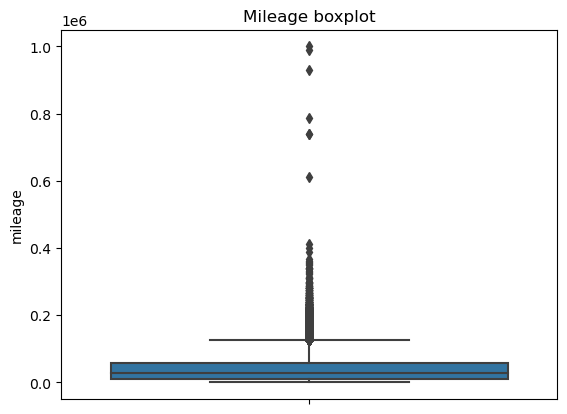

In [11]:
sns.boxplot(y=df['mileage'])
plt.title("Mileage boxplot")

Text(0.5, 1.0, 'price boxplot')

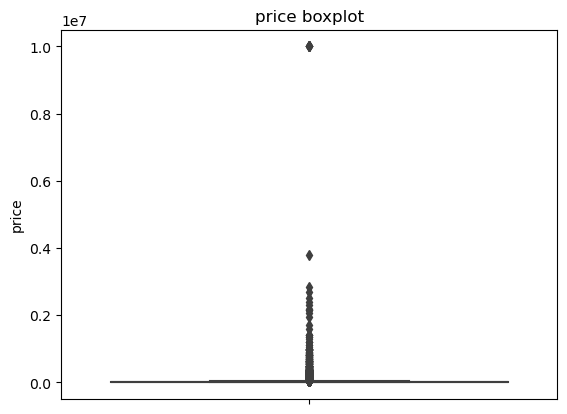

In [12]:
sns.boxplot(y=df['price'])
plt.title("price boxplot")

Text(0.5, 1.0, 'year boxplot')

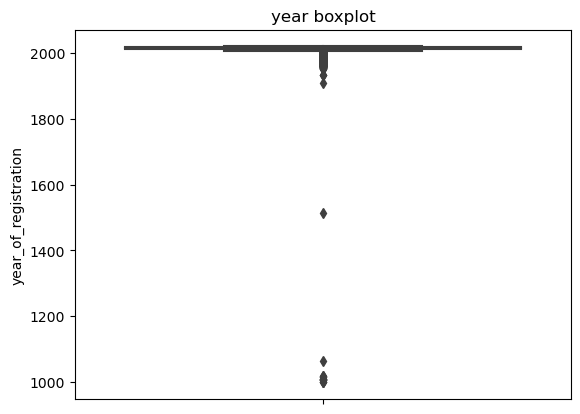

In [13]:
sns.boxplot(y=df['year_of_registration'])
plt.title("year boxplot")

In [14]:
df.isna().mean()*100

public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64

In [15]:
df['crossover_car_and_van']=df['crossover_car_and_van'].astype(str)



In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

public_reference        1.151927e+09
mileage                 4.639475e+04
year_of_registration    5.000000e+00
price                   1.250500e+04
dtype: float64


<AxesSubplot:xlabel='vehicle_condition', ylabel='mileage'>

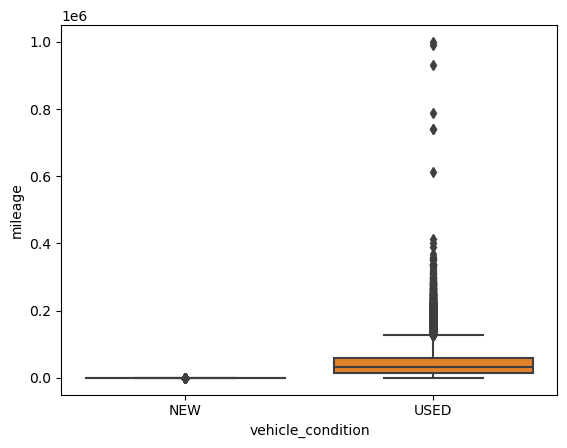

In [17]:
sns.boxplot(y=df['mileage'],x=df['vehicle_condition'])

<AxesSubplot:xlabel='vehicle_condition', ylabel='price'>

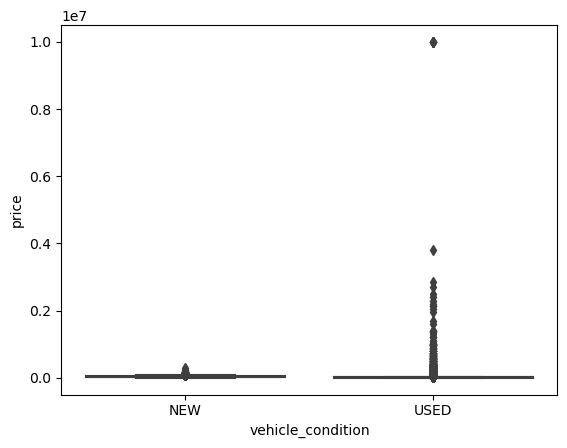

In [18]:
sns.boxplot(y=df['price'],x=df['vehicle_condition'])

In [19]:
wrong_years=[1009, 1007,1008,1006,1016,1017,1010,1015,1018] # wrong years , changing them to 2
wrong_years_to_drop=[1515,1063]
repl_=df[df['year_of_registration'].isin(wrong_years)]['year_of_registration'].astype(str).apply(lambda x: x.replace("1","2",1)).astype(float)
df.loc[repl_.index,'year_of_registration']=repl_.values

repl_=df[df['year_of_registration'].isin([999])]['year_of_registration'].astype(str).apply(lambda x: '1'+x).astype(float)
df.loc[repl_.index,'year_of_registration']=repl_.values


In [20]:
df=df[(df['year_of_registration']!=1515) &(df['year_of_registration']!=1063)]
df.reset_index(drop=True,inplace=True)

In [21]:
#get mapping for year

mapping_year=pd.read_csv("age_final_wiki.csv")
mapping_year['Year']=mapping_year['Year'].astype(float)
mapping_year=mapping_year.set_index('Letter').to_dict()['Year']
df['year_of_registration'] = df['year_of_registration'].replace(np.nan, 2020)

In [22]:
# dealing with missing values
df['standard_colour']=df['standard_colour'].fillna(df['standard_colour'].mode()[0])
df['mileage']=df['mileage'].fillna(value=np.mean(df['mileage']))

mode_body_type=df.groupby(['standard_model'])['body_type'].agg(pd.Series.mode).to_dict()
mode_fuel_type=df.groupby(['standard_model'])['fuel_type'].agg(pd.Series.mode).to_dict()

df['body_type']=df['body_type'].fillna(value=mode_body_type)
df['fuel_type']=df['fuel_type'].fillna(value=mode_fuel_type)
df['year_of_registration']=df['year_of_registration'].fillna(value=mapping_year)
df['crossover_car_and_van']=df['crossover_car_and_van'].astype(str)
df['year_of_registration']=df['year_of_registration'].astype(str).astype(float)

# fxing outliers 
df = df[df['price']<4000000]
df = df[df['mileage']<400000]

#feature engineering
df['bio_fuel']=df['fuel_type'].apply(lambda x :0 if x =='Diesel' or x=='Petrol' else 1)
df['zero_meter_or_not']=df['mileage'].apply(lambda x: 1 if x==0 else 0)
df['age_of_car']=2021-df['year_of_registration'] 
df['average_yearly_mileage']=df['age_of_car']/df['mileage']
def get_milage_score(x):
    if x <7400:
        return 'Low Mileage'
    elif x==7400:
        return 'Avg Mileage'
    else:
        return 'High Mileage'
df['Car_Ranking']=df['mileage'].apply(lambda z: get_milage_score(z))

In [23]:
df= df.drop(columns=['public_reference','reg_code'])
 
df=df.sample(frac=0.7,random_state=101)

Quantitative-Quantitative

<AxesSubplot:>

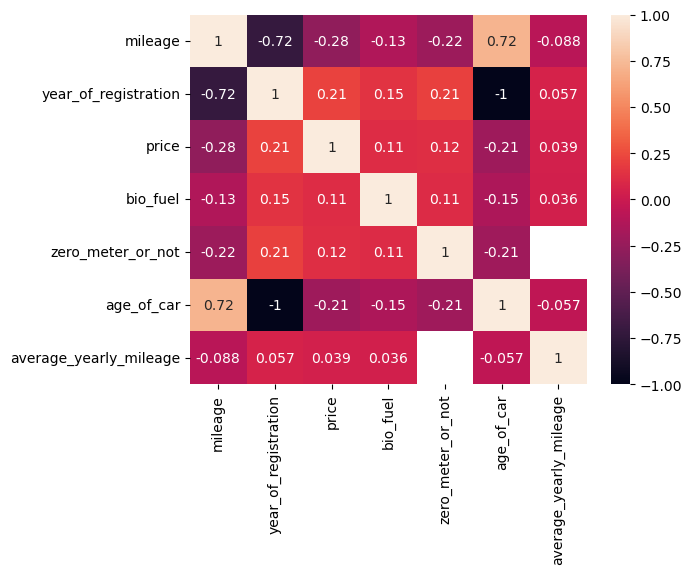

In [24]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='mileage'>

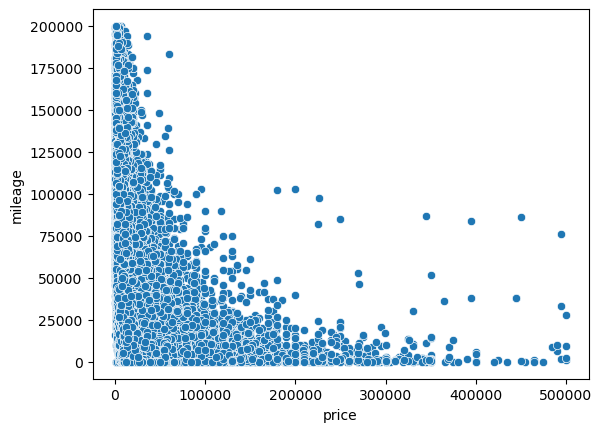

In [25]:
dfm=df[df['mileage']<=200000]
dfm=dfm[dfm['price']<=500000]
sns.scatterplot(data=dfm,x='price',y='mileage')

<AxesSubplot:xlabel='age_of_car'>

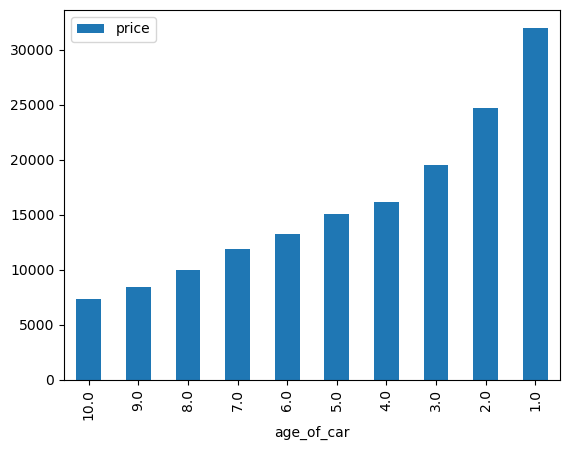

In [26]:
df.groupby(['age_of_car']).agg({"price":"mean"}).sort_values(by='age_of_car',ascending=False).tail(10).plot(kind='bar')

<AxesSubplot:xlabel='year_of_registration'>

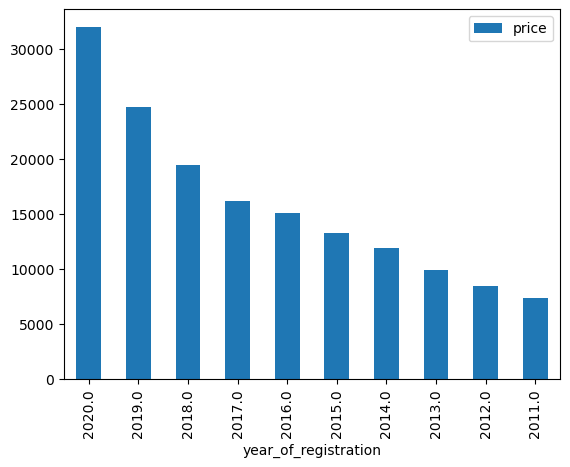

In [27]:
df.groupby(['year_of_registration']).agg({"price":"mean"}).sort_values(by='year_of_registration',ascending=False).head(10).plot(kind='bar')

Quantitative-Categorical

In [28]:
df.groupby(['fuel_type']).agg({"price":"mean"}).sort_values(by='price',ascending=False)

,price
fuel_type,
Diesel Hybrid,40121.523158
Petrol Plug-in Hybrid,36626.038264
Diesel Plug-in Hybrid,35151.856061
Electric,32498.188640
Petrol Hybrid,19979.916525
Diesel,16526.946043
Petrol,16289.890110
Bi Fuel,14487.633987
Natural Gas,3795.000000


In [29]:
from scipy.stats import f_oneway
F,p = f_oneway(df[df['fuel_type']=='Electric'].price,
        df[df['fuel_type']=='Petrol'].price)

In [30]:
F,p

(1094.5416387650353, 3.475905225088439e-239)

In [31]:
df.groupby(['standard_make']).agg({"price":"mean"}).sort_values(by='price',ascending=False).head(10)

,price
standard_make,
Pagani,2.400000e+06
Bugatti,2.215000e+06
McLaren,2.086213e+05
Ferrari,1.874397e+05
Lamborghini,1.808872e+05
Rolls-Royce,1.505959e+05
Aston Martin,1.121304e+05
BAC,1.049500e+05
AC,9.495000e+04


<AxesSubplot:xlabel='standard_make'>

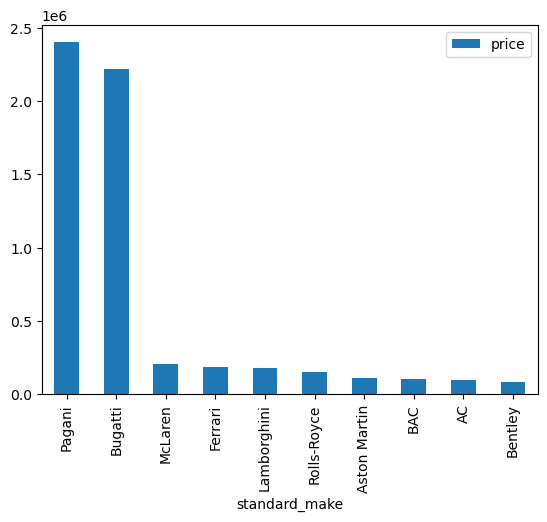

In [32]:
df.groupby(['standard_make']).agg({"price":"mean"}).sort_values(by='price',ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='body_type'>

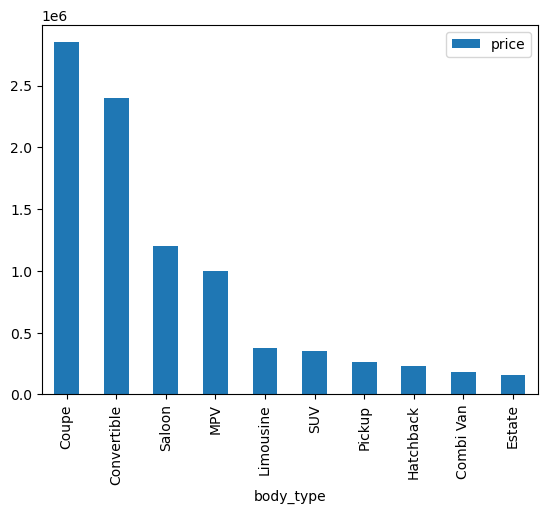

In [33]:
df.groupby(['body_type']).agg({"price":"max"}).sort_values(by='price',ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='fuel_type'>

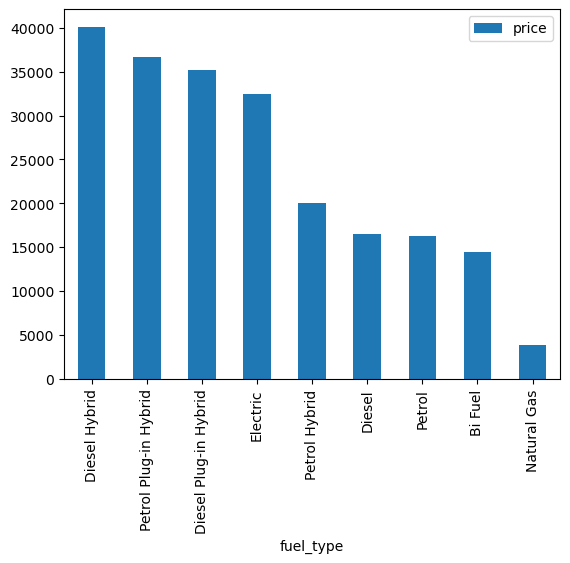

In [34]:
df.groupby(['fuel_type']).agg({"price":"mean"}).sort_values(by='price',ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='vehicle_condition'>

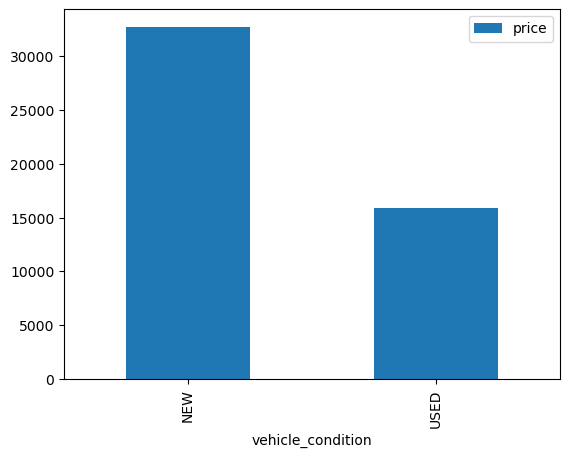

In [35]:
df.groupby(['vehicle_condition']).agg({"price":"mean"}).sort_values(by='price',ascending=False).plot(kind='bar')

Categorical-Categorical

In [36]:
# Import association_metrics 
import association_metrics as am
# Convert you str columns to Category columns
df = df.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,Car_Ranking
standard_colour,1.000000,0.115281,0.207158,0.102653,0.055116,0.035158,0.054932,0.078094
standard_make,0.115281,1.000000,0.962733,0.230342,0.255208,0.201698,0.363517,0.141276
standard_model,0.207158,0.962733,1.000000,0.378073,0.785855,0.873545,0.551476,0.297349
vehicle_condition,0.102653,0.230342,0.378073,1.000000,0.132567,0.006926,0.179870,0.574204
body_type,0.055116,0.255208,0.785855,0.132567,1.000000,0.694703,0.141058,0.100555
crossover_car_and_van,0.035158,0.201698,0.873545,0.006926,0.694703,1.000000,0.084833,0.002869
fuel_type,0.054932,0.363517,0.551476,0.179870,0.141058,0.084833,1.000000,0.163809
Car_Ranking,0.078094,0.141276,0.297349,0.574204,0.100555,0.002869,0.163809,1.000000


<AxesSubplot:>

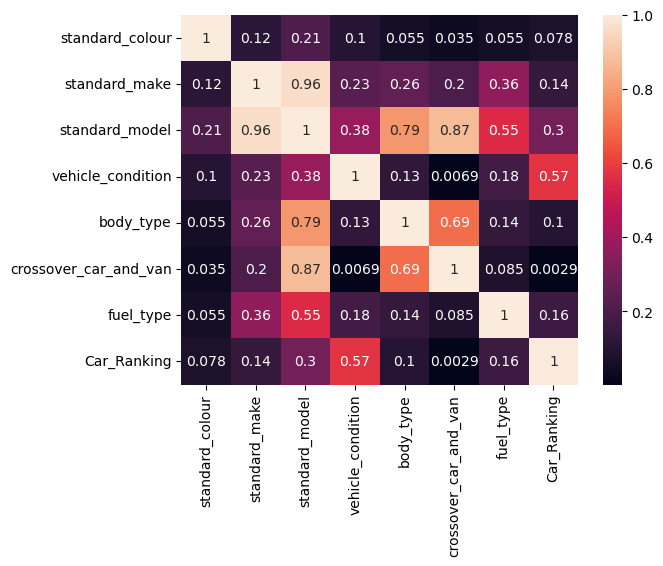

In [37]:
sns.heatmap(cramersv.fit(),annot=True)

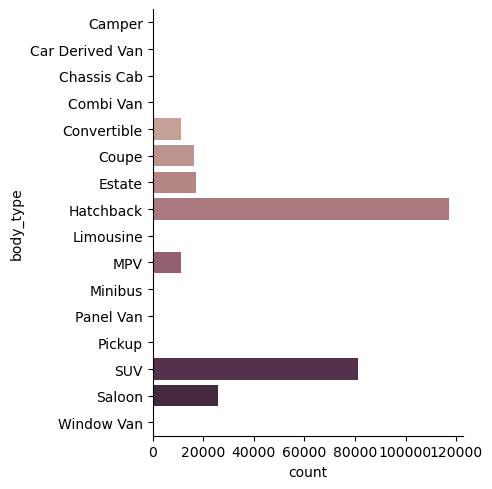

In [38]:
sns.catplot(data=df, y="body_type", kind="count", palette="ch:.25")

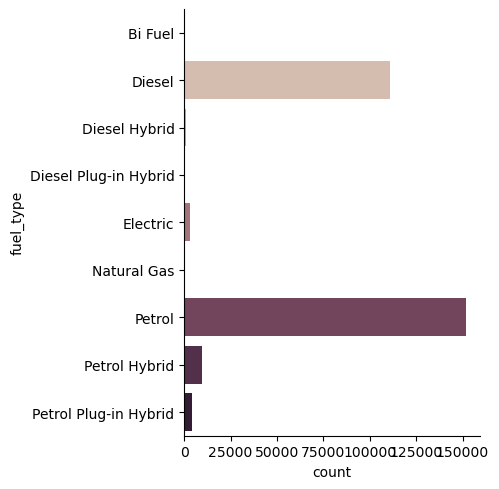

In [39]:
sns.catplot(data=df, y="fuel_type", kind="count", palette="ch:.25")

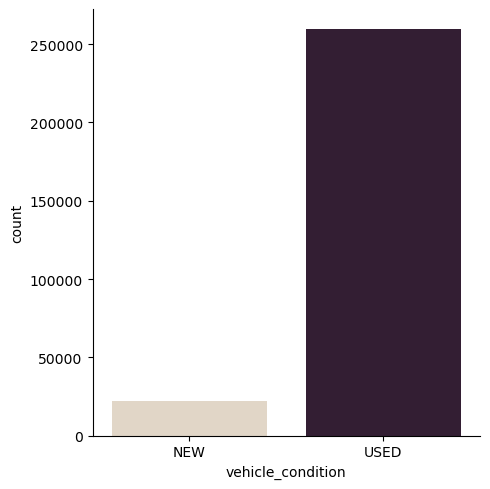

In [40]:
sns.catplot(data=df, x="vehicle_condition", kind="count", palette="ch:.25")